In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

landtemps = pd.read_csv('C:\dataClean\Python-Data-Cleaning-Cookbook\Chapter05\data\landtemps2019avgs.csv')
covidtotals = pd.read_csv('C:\dataClean\Python-Data-Cleaning-Cookbook\Chapter05\data\covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

In [16]:
landtemps[['station', 'country', 'latabs', 'elevation', 'avgtemp']].sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


In [17]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [18]:
landtemps.avgtemp.skew()

-0.26783825834817704

In [19]:
landtemps.avgtemp.kurtosis()

2.1698313707061074

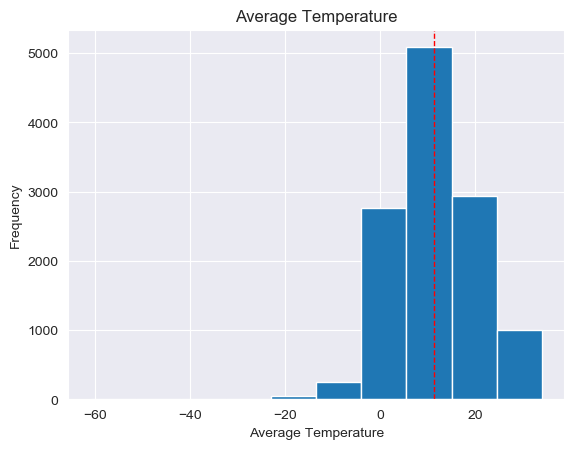

In [20]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Average Temperature")
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

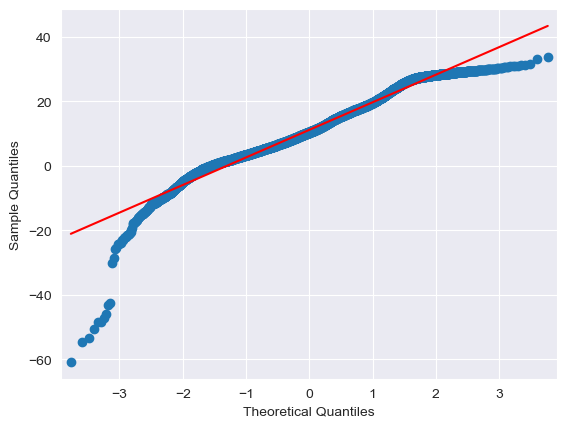

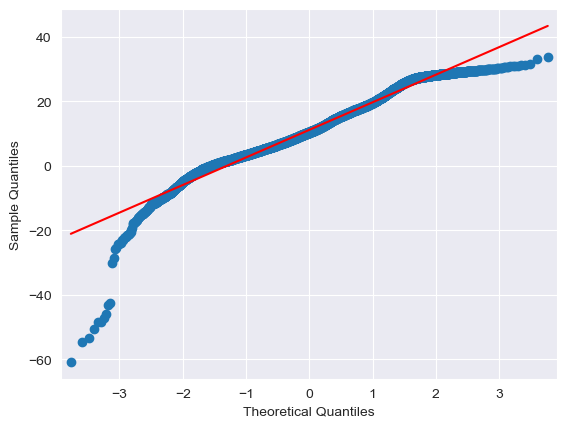

In [21]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')

In [22]:
covidtotals.total_cases_pm.skew()

4.284484653881833

In [23]:
covidtotals.total_cases_pm.kurtosis()

26.137524276840452

C:\Users\0ly\.conda\envs\pandas1\lib\site-packages\numpy\core\fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
C:\Users\0ly\.conda\envs\pandas1\lib\site-packages\matplotlib\cbook\__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


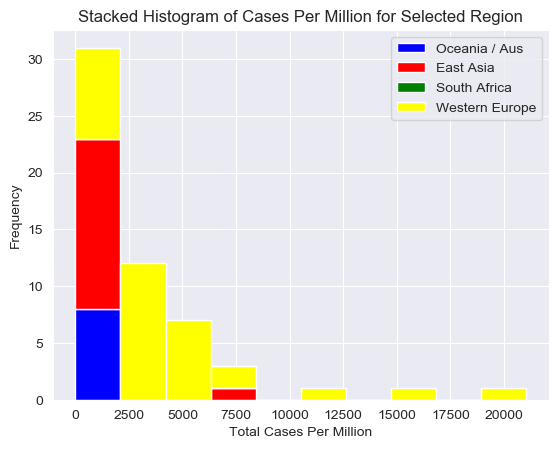

In [27]:
# 堆叠的直方图
showregions = ['Oceania / Aus', 'East Asia', 'South Africa', 'Western Europe']
def getcases(regiondesc):
    return covidtotals.loc[covidtotals.region == regiondesc, 'total_cases_pm']
plt.hist([getcases(k) for k in showregions], color=['blue', 'red', 'green', 'yellow'], label=showregions, stacked=True)
plt.title("Stacked Histogram of Cases Per Million for Selected Region")
plt.xlabel('Total Cases Per Million')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()

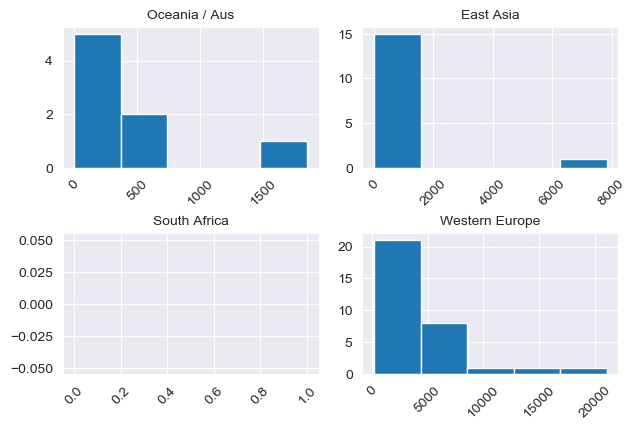

In [31]:
fig, axes = plt.subplots(2,2)
# fig.title("histograms of covid cases per million by selected region")
axes = axes.ravel()
for j, ax in enumerate(axes):
    ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].total_cases_pm, bins=5)
    ax.set_title(showregions[j], fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
plt.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()